In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time
import datetime
import statsmodels.api as sm
import scipy
from tqdm import tqdm_notebook 
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from statsmodels import api as stm 
from statsmodels import tools
from scipy.optimize import minimize
from datetime import timedelta
from dateutil.relativedelta import relativedelta
plt.style.use("seaborn")
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [48]:
raw_data = pd.read_excel('raw_data_all.xls',index_col=0 )
column = [0,1]+list(range(3,raw_data.shape[1]-2))
data = pd.DataFrame(raw_data.iloc[:,column].values, columns = raw_data.columns[column])

In [49]:
data

,date,security_code,大型商业银行/政策性银行,股份制商业银行,城市商业银行,农村金融机构,外资银行,境外机构,证券公司,保险公司,基金公司及产品,理财类产品
0,2018-01-02,170004,0,-2.4,0,0,0,2.4,0,0,0,0
1,2018-01-03,170004,0,1,0,-0.3,0,0,-0.5,0,-0.2,0
2,2018-01-04,170004,0,0.3,2,0,0,0,-2,0,-0.3,0
3,2018-01-05,170004,0,0.9,0,0,0,0,-0.9,0,0,0
4,2018-01-08,170004,0,0,0,0,0,0,0.8,0,0,-0.8
...,...,...,...,...,...,...,...,...,...,...,...,...
35990,2020-10-26,91918002,0,0,0,0,0,0,0,0,0,0
35991,2020-10-27,91918002,0,0,0,0,0,0,0,0,0,0
35992,2020-10-28,91918002,0,0,0,0,0,0,0,0,0,0
35993,2020-10-29,91918002,0,0,0,0,0,0,0,0,0,0


In [50]:
daily_data = data.groupby("date").agg('sum').iloc[:,1:]

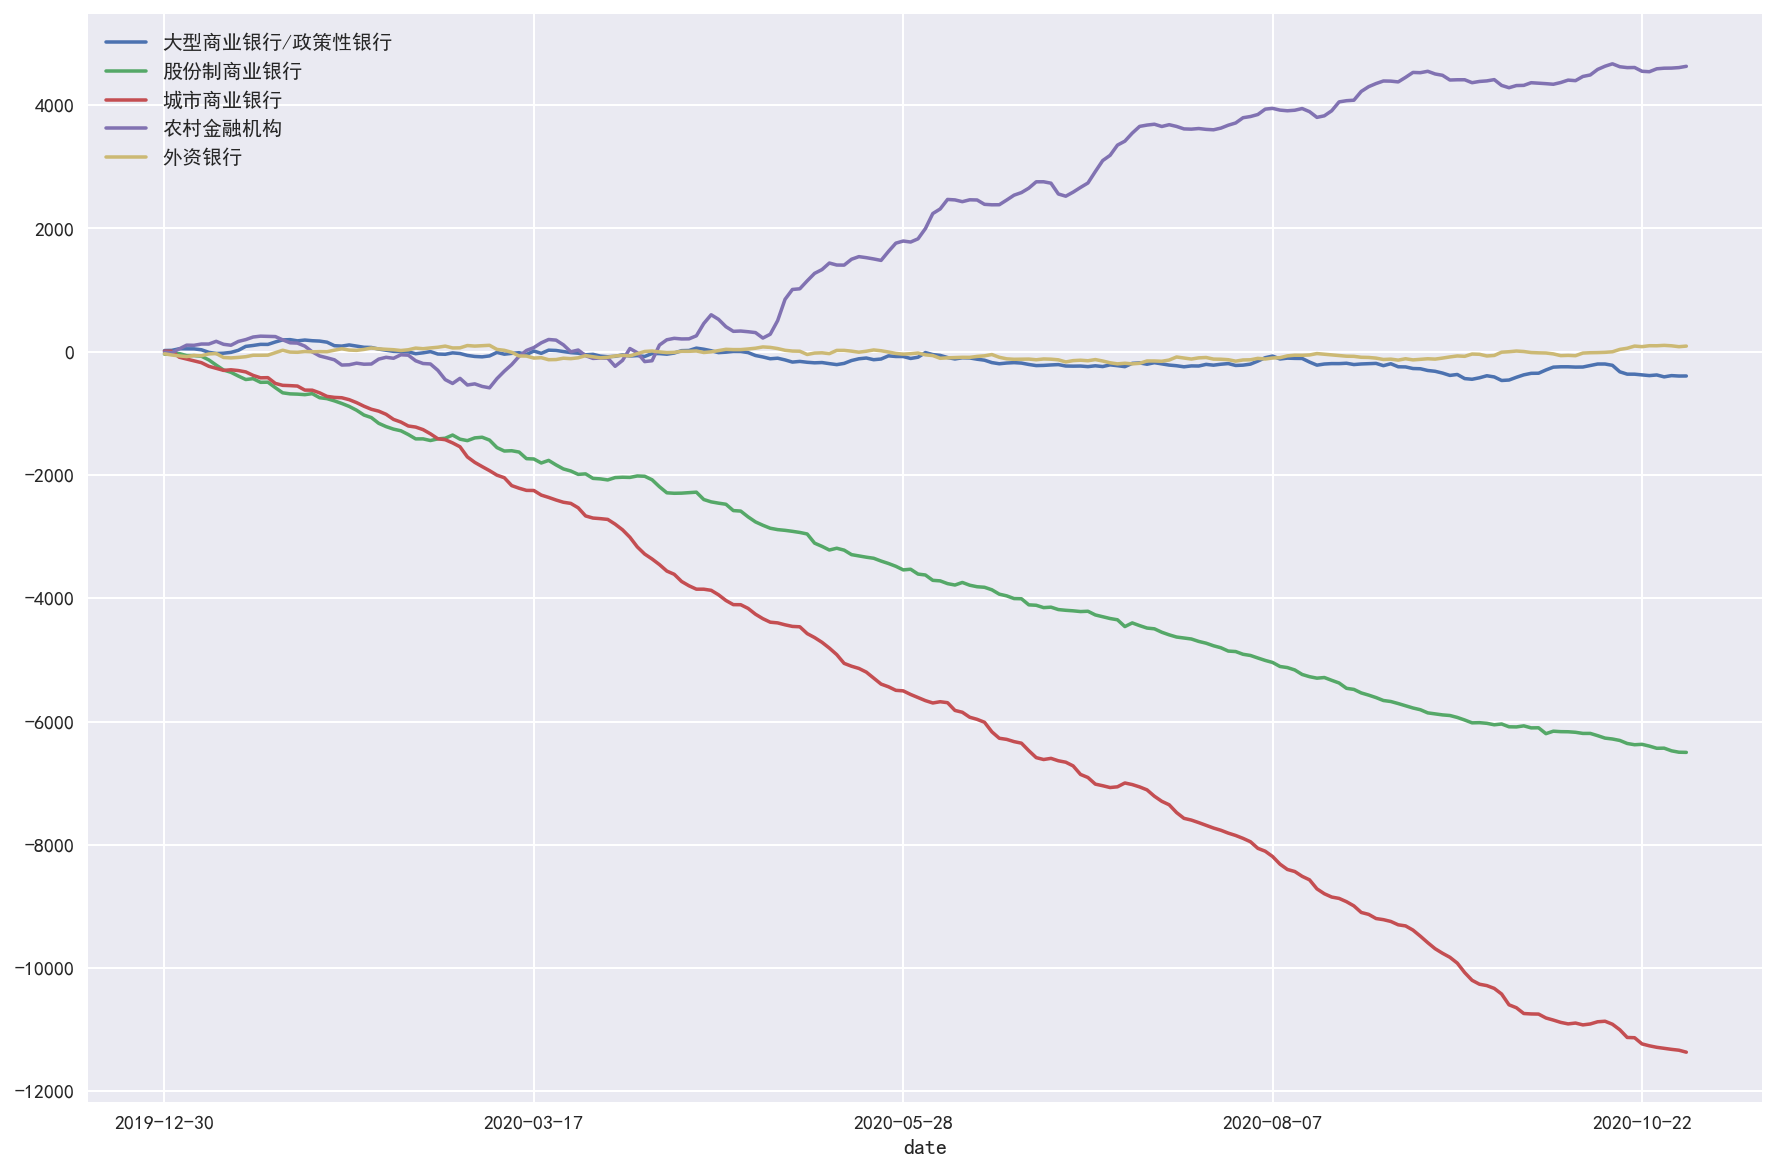

In [57]:
daily_data.iloc[500:,:5].cumsum().plot(legend=True,figsize=(15,10))

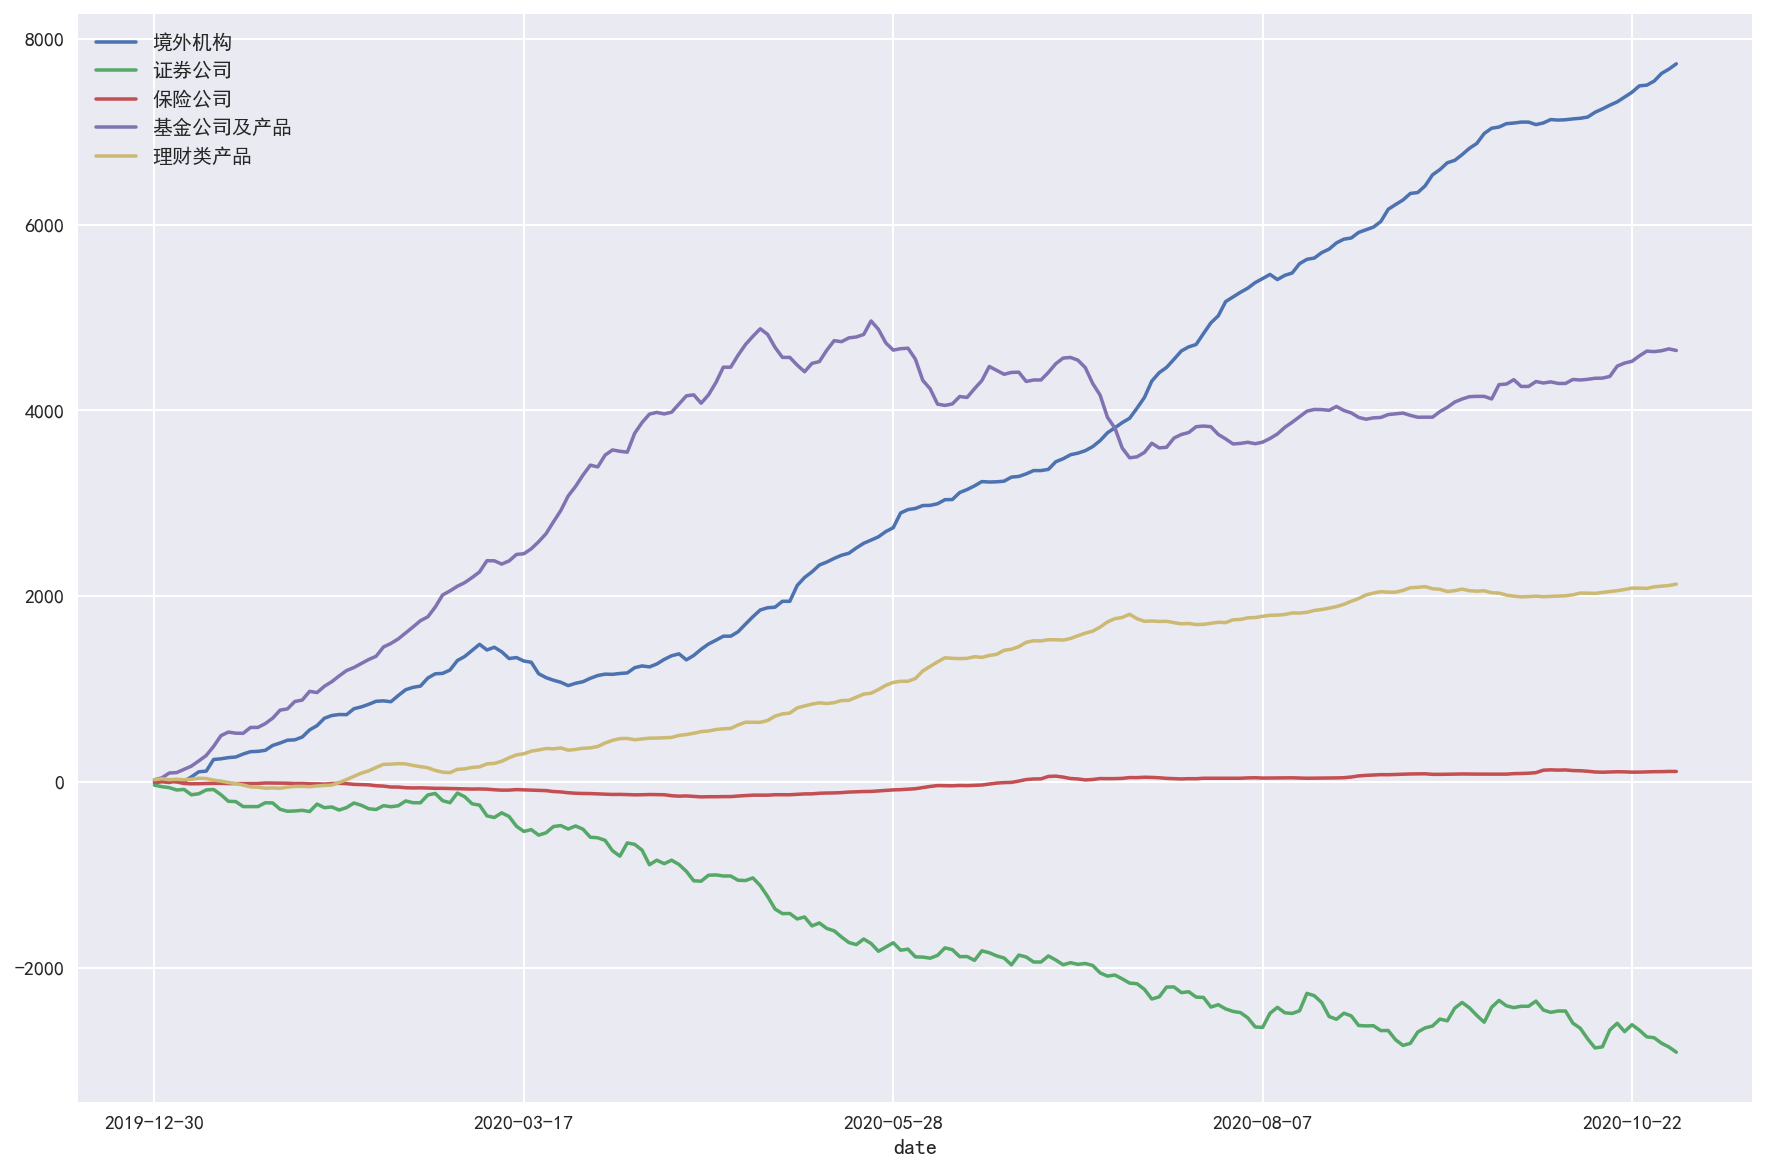

In [58]:
daily_data.iloc[500:,5:].cumsum().plot(legend=True,figsize=(15,10))

In [63]:
daily_data.corr()

,大型商业银行/政策性银行,股份制商业银行,城市商业银行,农村金融机构,外资银行,境外机构,证券公司,保险公司,基金公司及产品,理财类产品
大型商业银行/政策性银行,1.000000,0.053940,0.130038,0.109590,-0.179153,-0.380181,-0.317831,0.097618,-0.075026,-0.018204
股份制商业银行,0.053940,1.000000,0.192082,-0.171581,-0.053973,-0.247241,-0.135613,-0.000602,-0.163112,-0.148127
城市商业银行,0.130038,0.192082,1.000000,0.098417,-0.201650,-0.290548,-0.395262,0.016558,-0.306947,-0.146674
农村金融机构,0.109590,-0.171581,0.098417,1.000000,-0.353433,-0.077823,-0.387302,0.108626,-0.572909,0.378519
外资银行,-0.179153,-0.053973,-0.201650,-0.353433,1.000000,0.072643,0.248187,-0.178149,0.170695,-0.232193
境外机构,-0.380181,-0.247241,-0.290548,-0.077823,0.072643,1.000000,-0.007632,-0.004729,-0.032299,0.006924
证券公司,-0.317831,-0.135613,-0.395262,-0.387302,0.248187,-0.007632,1.000000,-0.047661,-0.028010,-0.096109
保险公司,0.097618,-0.000602,0.016558,0.108626,-0.178149,-0.004729,-0.047661,1.000000,-0.250134,0.239731
基金公司及产品,-0.075026,-0.163112,-0.306947,-0.572909,0.170695,-0.032299,-0.028010,-0.250134,1.000000,-0.322074
理财类产品,-0.018204,-0.148127,-0.146674,0.378519,-0.232193,0.006924,-0.096109,0.239731,-0.322074,1.000000


In [64]:
cum_data = daily_data.rolling(30).agg("sum")

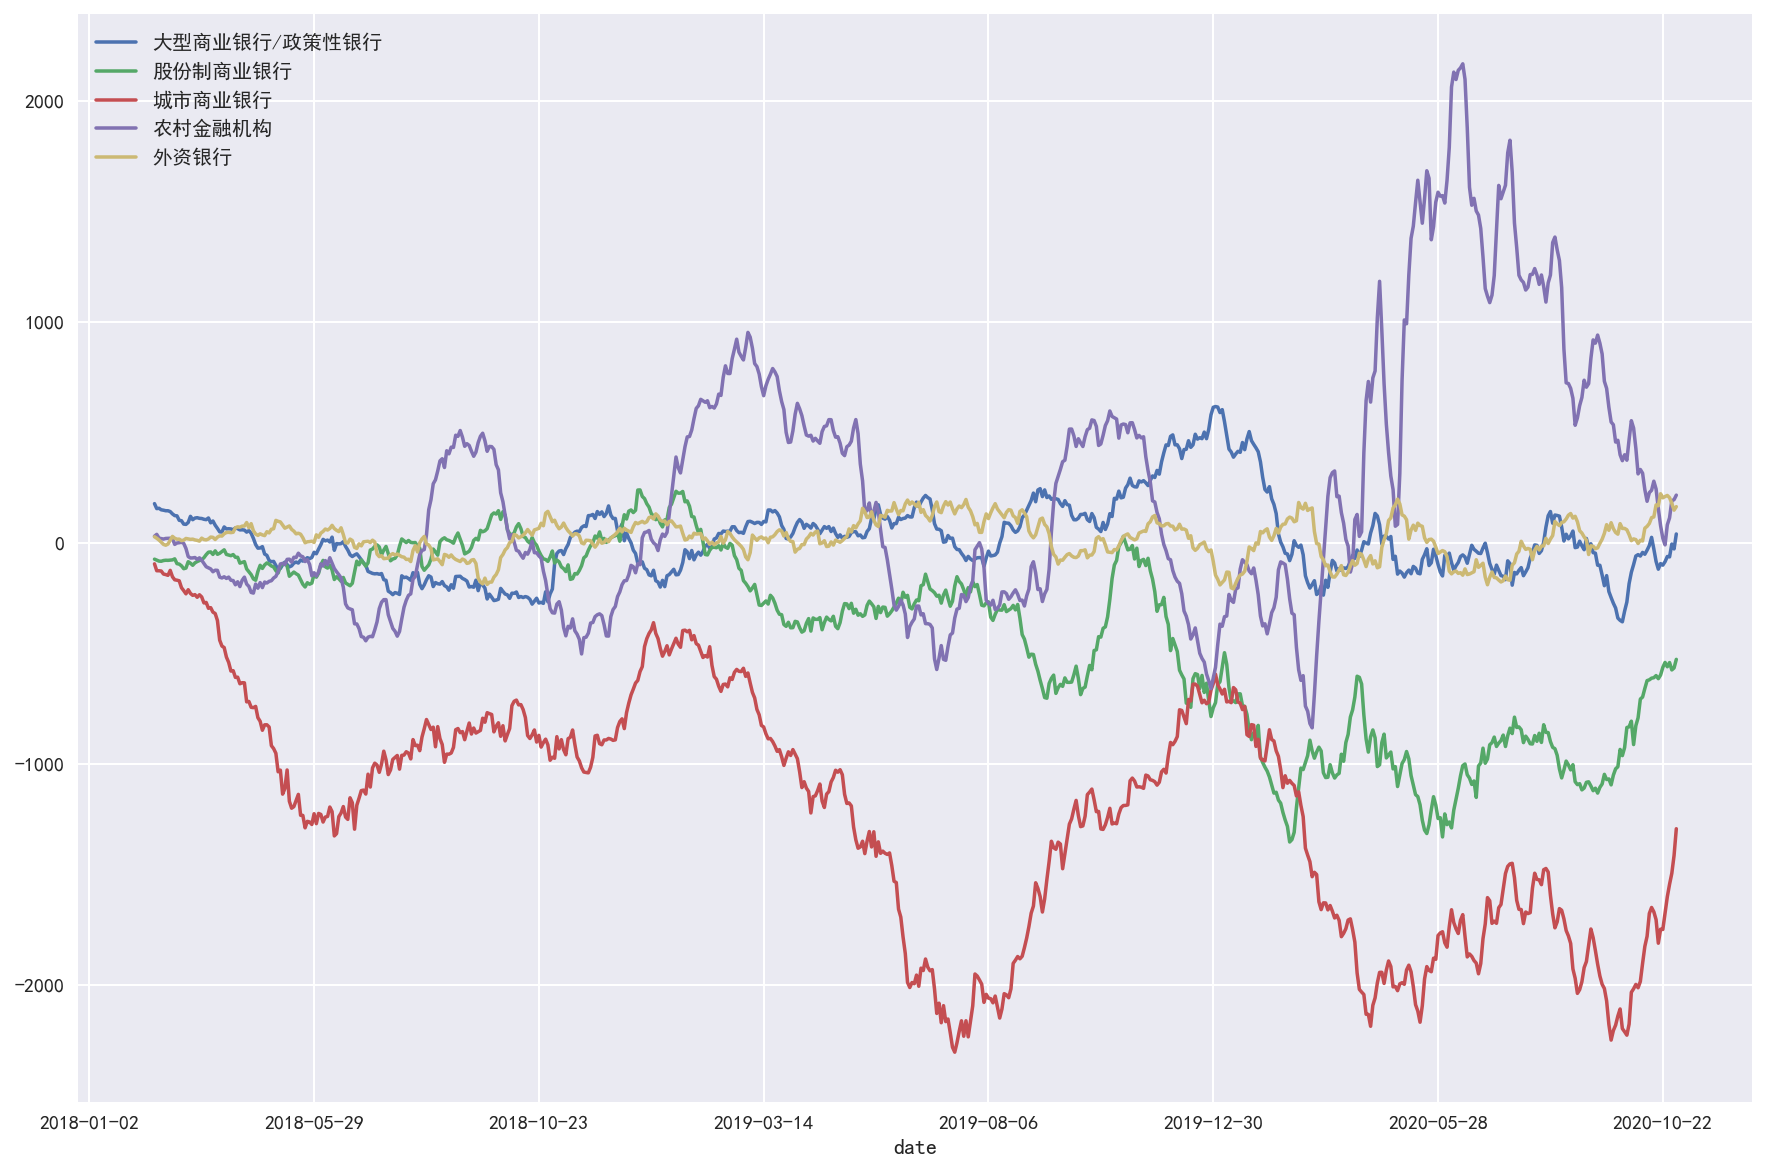

In [67]:
cum_data.iloc[:,:5].plot(legend=True,figsize=(15,10))

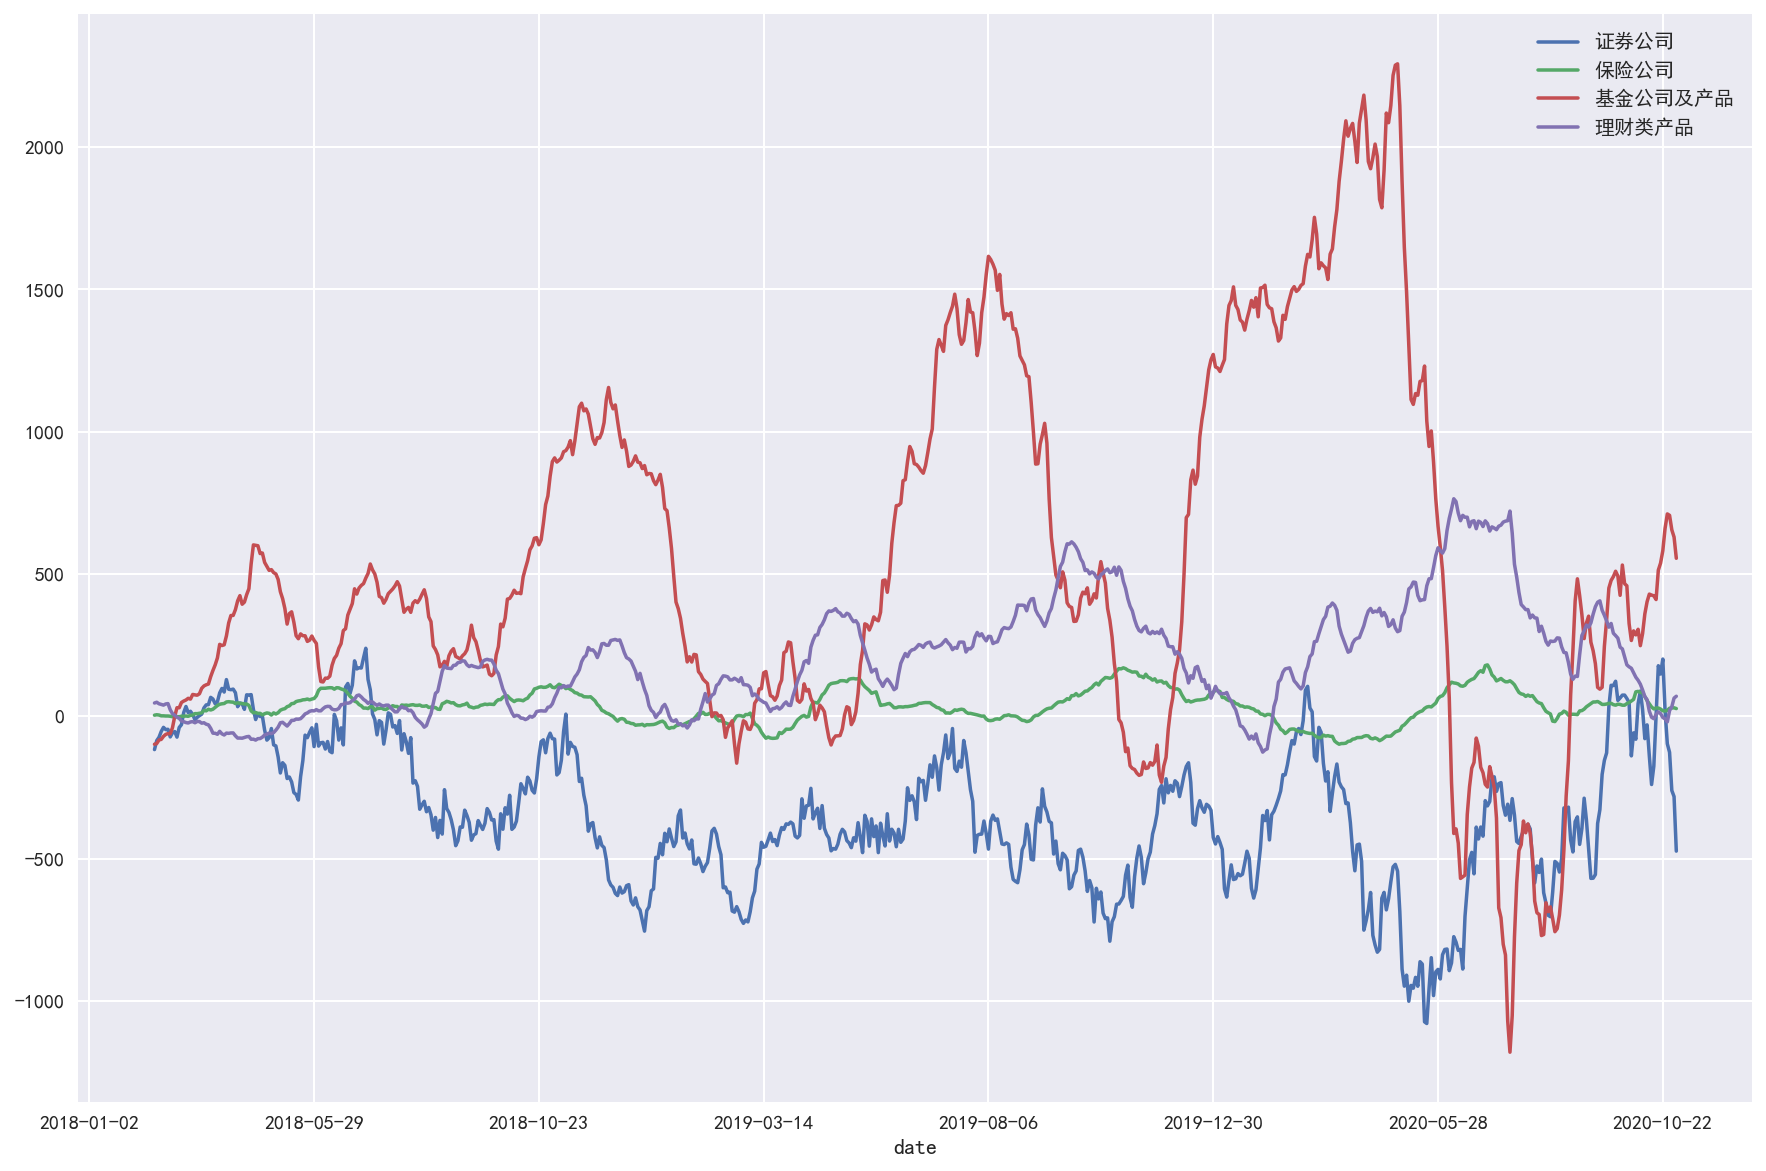

In [72]:
cum_data.iloc[:,6:].plot(legend=True,figsize=(15,10))

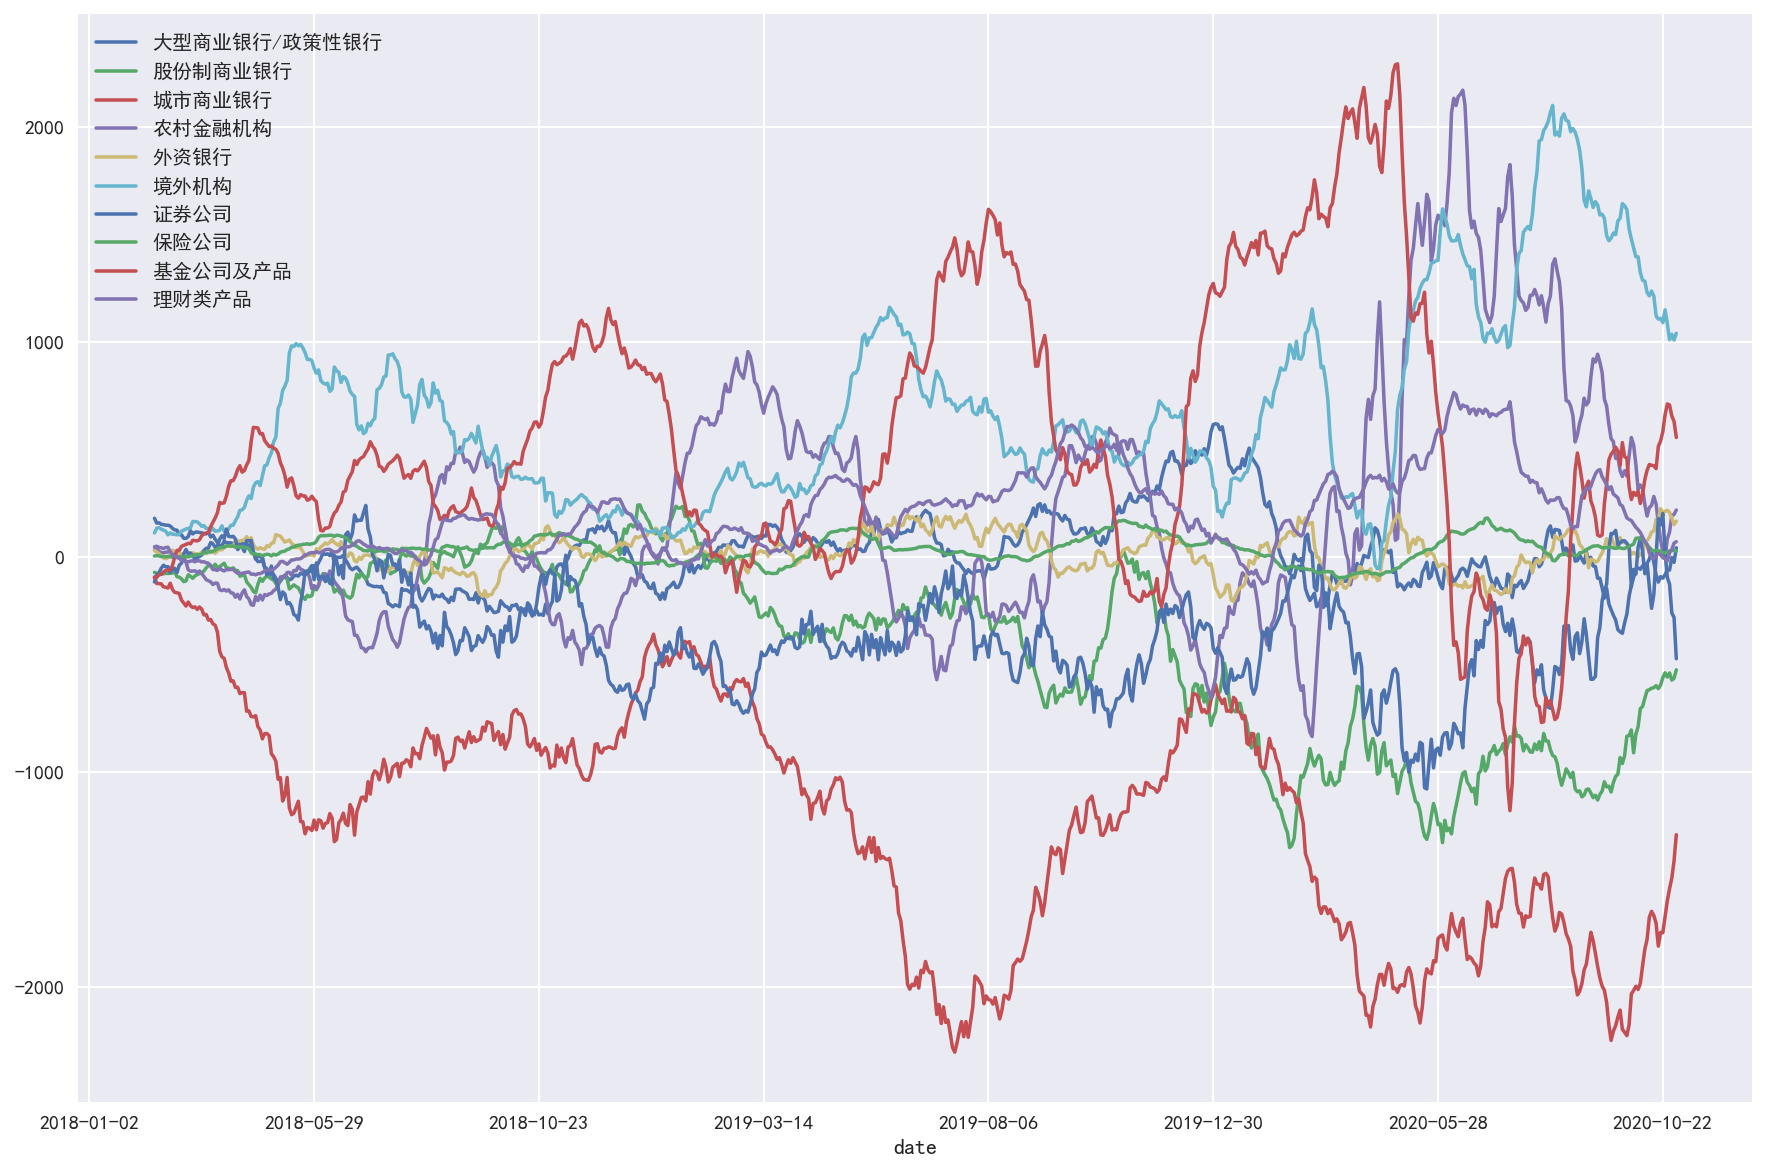

In [71]:
cum_data.iloc[:,:].plot(legend=True,figsize=(15,10))

In [74]:
cum_data.corr()

,大型商业银行/政策性银行,股份制商业银行,城市商业银行,农村金融机构,外资银行,境外机构,证券公司,保险公司,基金公司及产品,理财类产品
大型商业银行/政策性银行,1.000000,-0.078236,0.201159,-0.213974,0.003979,-0.229090,-0.181257,0.154143,0.063315,-0.006287
股份制商业银行,-0.078236,1.000000,0.598387,-0.435521,0.153434,-0.609248,0.236350,0.079959,-0.195835,-0.519830
城市商业银行,0.201159,0.598387,1.000000,-0.267339,-0.182978,-0.619897,0.154239,0.000622,-0.283243,-0.586482
农村金融机构,-0.213974,-0.435521,-0.267339,1.000000,-0.389854,0.433601,-0.561596,0.187681,-0.511963,0.606666
外资银行,0.003979,0.153434,-0.182978,-0.389854,1.000000,0.075575,0.208177,-0.174755,0.214970,-0.284273
境外机构,-0.229090,-0.609248,-0.619897,0.433601,0.075575,1.000000,-0.045233,0.229098,-0.285871,0.360588
证券公司,-0.181257,0.236350,0.154239,-0.561596,0.208177,-0.045233,1.000000,0.028856,-0.057093,-0.509288
保险公司,0.154143,0.079959,0.000622,0.187681,-0.174755,0.229098,0.028856,1.000000,-0.536285,0.322762
基金公司及产品,0.063315,-0.195835,-0.283243,-0.511963,0.214970,-0.285871,-0.057093,-0.536285,1.000000,-0.094677
理财类产品,-0.006287,-0.519830,-0.586482,0.606666,-0.284273,0.360588,-0.509288,0.322762,-0.094677,1.000000
